<a href="https://colab.research.google.com/github/pranavagrawal321/Amazon-Reviews-Sentiment-Analysis/blob/main/Sentiment_Analysis_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
headers = ["asin", "title", "stars", "description"]

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/pranavagrawal321/Amazon-Reviews-Sentiment-Analysis/main/amazon_dataset.csv", names=headers)
df.head()

asin                            title                 stars  \
0  'B00004TZY8'                    'Low quality'  '1.0 out of 5 stars'   
1  'B00004TZY8'                         'Review'  '5.0 out of 5 stars'   
2  'B00004TZY8'                           'Nice'  '4.0 out of 5 stars'   
3  'B00004TZY8'  'enjoy with playing this cards'  '5.0 out of 5 stars'   
4  'B00004TZY8'            'Value for the money'  '5.0 out of 5 stars'   

                                         description  
0  'For a price like this they should have at lea...  
1                                       'GOOD CARDS'  
2                                         'Nice ...'  
3               'packing is good no damage in cards'  
4                        'Good product for kitchen.'

In [4]:
df["asin"] = df["asin"].apply(lambda x: x.replace("'", ""))
df["title"] = df["title"].apply(lambda x: x.replace("'", ""))
df["description"] = df["description"].apply(lambda x: x.replace("'", ""))

In [5]:
df.head()

asin                          title                 stars  \
0  B00004TZY8                    Low quality  '1.0 out of 5 stars'   
1  B00004TZY8                         Review  '5.0 out of 5 stars'   
2  B00004TZY8                           Nice  '4.0 out of 5 stars'   
3  B00004TZY8  enjoy with playing this cards  '5.0 out of 5 stars'   
4  B00004TZY8            Value for the money  '5.0 out of 5 stars'   

                                         description  
0  For a price like this they should have at leas...  
1                                         GOOD CARDS  
2                                           Nice ...  
3                 packing is good no damage in cards  
4                          Good product for kitchen.

In [6]:
df.shape

(87368, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87368 entries, 0 to 87367
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   asin         87368 non-null  object
 1   title        87368 non-null  object
 2   stars        87350 non-null  object
 3   description  87368 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [8]:
df["asin"].dropna()

0        B00004TZY8
1        B00004TZY8
2        B00004TZY8
3        B00004TZY8
4        B00004TZY8
            ...    
87363    B0CKJ1T58V
87364    B0CKJ1T58V
87365    B0CKJ1T58V
87366    B0CKJ1T58V
87367    B0CKJ1T58V
Name: asin, Length: 87368, dtype: object

In [9]:
df["title"].dropna()

0                          Low quality
1                               Review
2                                 Nice
3        enjoy with playing this cards
4                  Value for the money
                     ...              
87363                              N/A
87364                              N/A
87365                              N/A
87366                              N/A
87367                              N/A
Name: title, Length: 87368, dtype: object

In [10]:
df = df[df["stars"].notna()]

In [11]:
df.shape

(87350, 4)

In [12]:
df["description"].dropna()

0        For a price like this they should have at leas...
1                                               GOOD CARDS
2                                                 Nice ...
3                       packing is good no damage in cards
4                                Good product for kitchen.
                               ...                        
87363    Love the fact that it is easy and go on smooth...
87364                    Prefect covage and sun protection
87365    I have a very sensitive combination skin type ...
87366    This lotion gives you an even skin tone with a...
87367    I love this tinted moisturizer. Goes on smooth...
Name: description, Length: 87350, dtype: object

In [13]:
df = df[~df['description'].str.contains('clickstreamnexusmetricsconfig', case=False)]

In [14]:
df = df[df["description"].str.len() != 0]

In [15]:
df

asin                          title                 stars  \
0      B00004TZY8                    Low quality  '1.0 out of 5 stars'   
1      B00004TZY8                         Review  '5.0 out of 5 stars'   
2      B00004TZY8                           Nice  '4.0 out of 5 stars'   
3      B00004TZY8  enjoy with playing this cards  '5.0 out of 5 stars'   
4      B00004TZY8            Value for the money  '5.0 out of 5 stars'   
...           ...                            ...                   ...   
87363  B0CKJ1T58V                            N/A                 'N/A'   
87364  B0CKJ1T58V                            N/A                 'N/A'   
87365  B0CKJ1T58V                            N/A                 'N/A'   
87366  B0CKJ1T58V                            N/A                 'N/A'   
87367  B0CKJ1T58V                            N/A                 'N/A'   

                                             description  
0      For a price like this they should have at leas...  
1                                             GOOD CARDS  
2                                               Nice ...  
3                     packing is good no damage in cards  
4                              Good product for kitchen.  
...                                                  ...  
87363  Love the fact that it is easy and go on smooth...  
87364                  Prefect covage and sun protection  
87365  I have a very sensitive combination skin type ...  
87366  This lotion gives you an even skin tone with a...  
87367  I love this tinted moisturizer. Goes on smooth...  

[84799 rows x 4 columns]

In [16]:
df = df[df["title"] != "N/A"]

In [17]:
df.shape

(83219, 4)

In [18]:
df

asin                             title                 stars  \
0      B00004TZY8                       Low quality  '1.0 out of 5 stars'   
1      B00004TZY8                            Review  '5.0 out of 5 stars'   
2      B00004TZY8                              Nice  '4.0 out of 5 stars'   
3      B00004TZY8     enjoy with playing this cards  '5.0 out of 5 stars'   
4      B00004TZY8               Value for the money  '5.0 out of 5 stars'   
...           ...                               ...                   ...   
87319  B0CKJ1T58V                              Best  '5.0 out of 5 stars'   
87320  B0CKJ1T58V                              Acne  '1.0 out of 5 stars'   
87321  B0CKJ1T58V                             Worse  '1.0 out of 5 stars'   
87322  B0CKJ1T58V                         Very good  '5.0 out of 5 stars'   
87323  B0CKJ1T58V  Do not buy if you have dark skin  '1.0 out of 5 stars'   

                                             description  
0      For a price like this they should have at leas...  
1                                             GOOD CARDS  
2                                               Nice ...  
3                     packing is good no damage in cards  
4                              Good product for kitchen.  
...                                                  ...  
87319            It best sunscreen … no .1 in my opinion  
87320  Why they have added salicylic. May be thats ir...  
87321  Looks like a clown with white cast. Not good f...  
87322            Very good color and good sun protection  
87323  This made me look like a clown. The tint disap...  

[83219 rows x 4 columns]

In [19]:
df["stars"].unique()

array(["'1.0 out of 5 stars'", "'5.0 out of 5 stars'",
       "'4.0 out of 5 stars'", ..., 'waterproof ', ' Ergonomic',
       " and the fit is perfect.'"], dtype=object)

In [20]:
len(df["stars"].unique())

1973

In [21]:
for i in df["stars"].unique():
    print(i)

'1.0 out of 5 stars'
'5.0 out of 5 stars'
'4.0 out of 5 stars'
'2.0 out of 5 stars'
 for long run
'3.0 out of 5 stars'
 super easy to cut fruits and vegetables'
 but the cards arent plastic.'
 but really good Design.'
 Bad Packing'
 Big and Robust'
 except the cost!'
 adha leak ho chuka tha'
 it can be used upto last gram
too watery
 but 1 eraser is missing in the package'
 very costly
 its highly overprices'
 long lasting'
'
 the spraying system is broken.'
 absolutely stunning'
 don’t buy'
 BUT'
 its dired inside'
good flavor
 Seal Broken'
 overall nice'
450g (150x3) (Pack Of 3)'
 price is high'
 but big.'
 wonderful
 and just about manage to do the required ...'
 so Relatively Safer When Used to Trim Moustache'
 small scrissor'
Wastage of Money'
 very good'
 does the job'
 could be a used product?'
😡😡😡'
 after sometime someparts of liner comesout'
present it’s okay'
 Sonata sf watch good looking'
TATA products'
 but the packaging was a little damaged'
 bad smell'
 Long Lasting Fresh

In [22]:
df = df[df["stars"].isin(["'1.0 out of 5 stars'", "'2.0 out of 5 stars'", "'3.0 out of 5 stars'", "'4.0 out of 5 stars'", "'5.0 out of 5 stars'"])]

In [23]:
df.head()

asin                          title                 stars  \
0  B00004TZY8                    Low quality  '1.0 out of 5 stars'   
1  B00004TZY8                         Review  '5.0 out of 5 stars'   
2  B00004TZY8                           Nice  '4.0 out of 5 stars'   
3  B00004TZY8  enjoy with playing this cards  '5.0 out of 5 stars'   
4  B00004TZY8            Value for the money  '5.0 out of 5 stars'   

                                         description  
0  For a price like this they should have at leas...  
1                                         GOOD CARDS  
2                                           Nice ...  
3                 packing is good no damage in cards  
4                          Good product for kitchen.

In [24]:
for i in df["asin"].unique():
    print(i)

B00004TZY8
B000WLFNLI
B001D7KU7W
B001FORK1C
B001PNHWFC
B002YOUJFG
B002ZVI6NK
B0037W5Y2W
B005FYNT3G
B005IW9J3Y
B006G84ILC
B006G84P60
B006G84U56
B006L7Q3OS
B006LX8GEC
B006LXBIGK
B006LXBSYM
B006LXDVTM
B006QAWHTK
B006QAXF9Q
B006QAXPFK
B0079Z9CGM
B007E9E9CK
B007E9I11K
B007E9INFO
B008KH2VU2
B008XT42JU
B0090E23CK
B00932DDUK
B00A7GPVXS
B00B0QCNXU
B00BMR071W
B00BOLFXI8
B00BOLFYV4
B00BOLGIRS
B00BSWG80K
B00BX5FOCK
B00C3GBCIS
B00CP3GEFK
B00D161WOI
B00DRE0SPI
B00DXYXG42
B00E3QVVQO
B00ECWG1NC
B00ENBQSW6
B00FMUGRTG
B00FRDAGB8
B00G4UB8C4
B00G4UBJLO
B00GTJSGXE
B00H5NMNXC
B00HT03SJY
B00I6F6HE4
B00INQMR4U
B00INTGY6O
B00IP6C1AI
B00IZ932CG
B00IZ949NW
B00IZ94LX0
B00J4YG0PC
B00J4YG746
B00J4YGI1S
B00JA3YCUW
B00JDACK3S
B00JJH9ZR4
B00JQYDL70
B00JXRR75C
B00K3U2DAM
B00KBNOMYG
B00KYK2ABI
B00LGMNRCO
B00LHZW3XY
B00LM4URQA
B00LM4VGA6
B00LM4W1N2
B00LQIZHA8
B00LQIZUE6
B00LQJ0UHM
B00LQJ116Q
B00LY1NYP2
B00LZLPYHW
B00LZLQ0TS
B00LZLQ3NG
B00LZLQ624
B00LZLQJV2
B00LZLR0QA
B00LZPT1A4
B00M0KK44A
B00M22H02U
B00M906BNO
B00MFNJHO0

In [25]:
len(df["title"].unique())

37469

In [26]:
for i in df["description"].unique():
    print(i)

Streaming output truncated to the last 5000 lines.
This is high quality scissors. Using these scissors since last 4 years without resharpening.
Its very sharp & serves the purpose of buying it.Very good for stiff fabric cutting
Very precise and sharp scissor.
Good scissors
a good quality product very sharp doesnt take much efforts to cut even thick paper/ jute thread weight is little heavy as compared to other cheaper scissors but totally worth the price.
Sharp & quality scissor!
Proudly made in India.
Good for domestic very sharp
Looks like old product
Nice cutting product....easy and comfortable to use...good material
Scissor is very sharp comfort table and Good build quality hope it will last long
A very good quality product for day to day usage
Broken scissors I received......
It is the best scissors I have experienced till date. It cuts cardboard thick clothes etc quite easily. If not careful it can cut finger too. Highly recommended.
This Munix 2185 scissor is less in performance

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
df.drop_duplicates(inplace=True)

<ipython-input-27-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [28]:
df.shape

(80530, 4)

In [29]:
df.drop(["title", "stars"], axis=1, inplace=True)

<ipython-input-29-3ec0a3ea3bf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["title", "stars"], axis=1, inplace=True)


In [30]:
df.head()

asin                                        description
0  B00004TZY8  For a price like this they should have at leas...
1  B00004TZY8                                         GOOD CARDS
2  B00004TZY8                                           Nice ...
3  B00004TZY8                 packing is good no damage in cards
4  B00004TZY8                          Good product for kitchen.

In [31]:
import re

In [32]:
df["description"] = df["description"].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

<ipython-input-32-c0b2d18fe8b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"] = df["description"].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)


In [33]:
df.head()

asin                                        description
0  B00004TZY8  For a price like this they should have at leas...
1  B00004TZY8                                         GOOD CARDS
2  B00004TZY8                                              Nice 
3  B00004TZY8                 packing is good no damage in cards
4  B00004TZY8                           Good product for kitchen

In [34]:
df["description"] = df["description"].str.lower()

<ipython-input-34-cf061ede16cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"] = df["description"].str.lower()


In [35]:
df.head()

asin                                        description
0  B00004TZY8  for a price like this they should have at leas...
1  B00004TZY8                                         good cards
2  B00004TZY8                                              nice 
3  B00004TZY8                 packing is good no damage in cards
4  B00004TZY8                           good product for kitchen

In [36]:
df.tail()

asin                                        description
87319  B0CKJ1T58V              it best sunscreen  no 1 in my opinion
87320  B0CKJ1T58V  why they have added salicylic may be thats irr...
87321  B0CKJ1T58V  looks like a clown with white cast not good fo...
87322  B0CKJ1T58V            very good color and good sun protection
87323  B0CKJ1T58V  this made me look like a clown the tint disapp...

In [37]:
!pip uninstall textblob -y
!pip install textblob

Found existing installation: textblob 0.17.1
Uninstalling textblob-0.17.1:
  Successfully uninstalled textblob-0.17.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 9.1 MB/s eta 0:00:00


In [38]:
from textblob import TextBlob

In [39]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [40]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [41]:
df["subjectivity"] = df["description"].apply(subjectivity)
df["polarity"] = df["description"].apply(polarity)

<ipython-input-41-dbda01f7116f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["subjectivity"] = df["description"].apply(subjectivity)
<ipython-input-41-dbda01f7116f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity"] = df["description"].apply(polarity)


In [42]:
df

asin                                        description  \
0      B00004TZY8  for a price like this they should have at leas...   
1      B00004TZY8                                         good cards   
2      B00004TZY8                                              nice    
3      B00004TZY8                 packing is good no damage in cards   
4      B00004TZY8                           good product for kitchen   
...           ...                                                ...   
87319  B0CKJ1T58V              it best sunscreen  no 1 in my opinion   
87320  B0CKJ1T58V  why they have added salicylic may be thats irr...   
87321  B0CKJ1T58V  looks like a clown with white cast not good fo...   
87322  B0CKJ1T58V            very good color and good sun protection   
87323  B0CKJ1T58V  this made me look like a clown the tint disapp...   

       subjectivity  polarity  
0          0.500000  0.200000  
1          0.600000  0.700000  
2          1.000000  0.600000  
3          0.600000  0.700000  
4          0.600000  0.700000  
...             ...       ...  
87319      0.300000  1.000000  
87320      0.800000 -0.100000  
87321      0.533333 -0.333333  
87322      0.690000  0.805000  
87323      0.000000  0.000000  

[80530 rows x 4 columns]

In [43]:
from wordcloud import WordCloud

In [44]:
words = " ".join([i for i in df["description"]])

In [45]:
words

'for a price like this they should have at least given a good quality cards these are just some cardboard cut outs sub par quality good cards nice  packing is good no damage in cards good product for kitchen good good buy it if you are a uno fan i dont like this uno card because some cards are missing like shuffle hand and blank cards faded looking product and size of font on instructions is impossible to read quality of cards and the print is very bad returning this product very cheap quality cards are too thin and below standard quality good quality cards with thick paper the media could not be loaded seems like just printed on thick paper very disappointed pathetic quality the quality of the cards were not up to the mark  not worth it the quality of the product is very bad the cards are made of very cheap papers not good for childrens you can play this game with your family and family very enjoyable game  nothing specific nice quality its duplicate originals are really bright and lo

In [46]:
cloud = WordCloud(random_state=42).generate(words)

In [47]:
import matplotlib.pyplot as plt

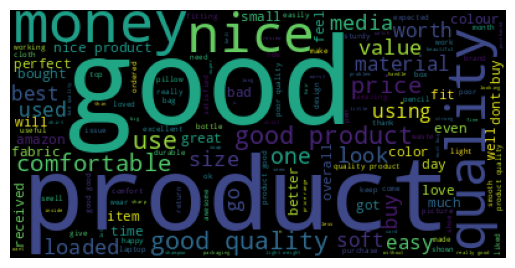

In [48]:
plt.axis("off")
plt.imshow(cloud)

In [49]:
def analysis(score):
    if score > 0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    else:
        return "Negative"

In [50]:
df["analysis"] = df["polarity"].apply(analysis)

<ipython-input-50-aa69e64f5755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["analysis"] = df["polarity"].apply(analysis)


In [51]:
df.head()

asin                                        description  \
0  B00004TZY8  for a price like this they should have at leas...   
1  B00004TZY8                                         good cards   
2  B00004TZY8                                              nice    
3  B00004TZY8                 packing is good no damage in cards   
4  B00004TZY8                           good product for kitchen   

   subjectivity  polarity  analysis  
0           0.5       0.2  Positive  
1           0.6       0.7  Positive  
2           1.0       0.6  Positive  
3           0.6       0.7  Positive  
4           0.6       0.7  Positive

In [52]:
df["analysis"].value_counts()

Positive    54663
Negative    13675
Neutral     12192
Name: analysis, dtype: int64

In [53]:
df[df["analysis"] == "Positive"].sort_values(by="polarity", ascending=False)

asin                                        description  \
63473  B0B34H2HWK                       price and quality is perfect   
13947  B075KCLGP6                            product quality is best   
7434   B019XSHCG4     awesome product thanku amazongoo forr itt guys   
80271  B0C4622G6N                                          excellent   
17924  B07D2W54D6                                    awesome product   
...           ...                                                ...   
9808   B01LXBW7TE  2 of the 4 moulded inner supports are broken r...   
39170  B08C3BMYLJ  the fabric loses firmness in one wash hence i ...   
81952  B0C72CM3M6  the product arrived broken the plastic quality...   
73408  B0BRJ7QX33  fit well to my 156 laptop using since 2 days i...   
61328  B09XTKJ1Q8  the power supply is not mentioned clearly in t...   

       subjectivity      polarity  analysis  
63473      1.000000  1.000000e+00  Positive  
13947      0.300000  1.000000e+00  Positive  
7434       1.000000  1.000000e+00  Positive  
80271      1.000000  1.000000e+00  Positive  
17924      1.000000  1.000000e+00  Positive  
...             ...           ...       ...  
9808       0.488889  1.850372e-17  Positive  
39170      0.466667  1.850372e-17  Positive  
81952      0.390000  1.665335e-17  Positive  
73408      0.533333  9.251859e-18  Positive  
61328      0.327778  4.625929e-18  Positive  

[54663 rows x 5 columns]

In [54]:
df[df["analysis"] == "Negative"].sort_values(by="polarity", ascending=False)

asin                                        description  \
86160  B0CGR7XGBH  cover of the sofa its zip cushions quality is ...   
25750  B07P3HRP4D  the cards are smooth and neat but the numbers ...   
31503  B07XMPYP1S  item is okay but battery life is too poor and ...   
74275  B0BSC7BZPY  thin particle boards and the diy took me more ...   
64035  B0B46P1CN8  i have used fabric quality and everything is g...   
...           ...                                                ...   
24275  B07M9BRCQ5                                      worst product   
11901  B071X8YK8S         this is the worst apron please dont buy it   
43611  B08P25CGX5  worst product and not delivery and well packin...   
82046  B0C74KRMHW             dont buy worst mobile hang this mobile   
71842  B0BN3ZJRKZ  worst quality no package  they sent it in tran...   

       subjectivity      polarity  analysis  
86160      0.600000 -4.625929e-18  Negative  
25750      0.561111 -6.938894e-18  Negative  
31503      0.350000 -6.938894e-18  Negative  
74275      0.583333 -9.251859e-18  Negative  
64035      0.525000 -1.387779e-17  Negative  
...             ...           ...       ...  
24275      1.000000 -1.000000e+00  Negative  
11901      1.000000 -1.000000e+00  Negative  
43611      1.000000 -1.000000e+00  Negative  
82046      1.000000 -1.000000e+00  Negative  
71842      1.000000 -1.000000e+00  Negative  

[13675 rows x 5 columns]

In [55]:
df[df["analysis"] == "Neutral"].sort_values(by="polarity", ascending=False)

asin                                        description  \
7      B00004TZY8                        buy it if you are a uno fan   
56202  B09M82PT64                                the product quality   
56156  B09LVH9PPN          the media could not be loaded badhiya hai   
56166  B09LVH9PPN                             stop working in 3 days   
56167  B09LVH9PPN                      the media could not be loaded   
...           ...                                                ...   
27388  B07R48C6WT                                            like it   
27399  B07R48C6WT  it is transparent but it melts too you cant gr...   
27400  B07R48C6WT  you cant get glycerine bathsoaps of 125mg at t...   
27411  B07R48C6WT                  bahut acha aur purchase karna hai   
87323  B0CKJ1T58V  this made me look like a clown the tint disapp...   

       subjectivity  polarity analysis  
7               0.0       0.0  Neutral  
56202           0.0       0.0  Neutral  
56156           0.0       0.0  Neutral  
56166           0.0       0.0  Neutral  
56167           0.0       0.0  Neutral  
...             ...       ...      ...  
27388           0.0       0.0  Neutral  
27399           0.0       0.0  Neutral  
27400           0.0       0.0  Neutral  
27411           0.0       0.0  Neutral  
87323           0.0       0.0  Neutral  

[12192 rows x 5 columns]